### Pytorch workflow

1) data preparation
2) build model
3) fitting the model 
4) making predictions and evaluating the model (inference)
5) saving and loading the model
6) putting all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#### Making linear regression

In [2]:
weight = 0.7
bias = 0.3

In [27]:
#Making data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step).unsqueeze(dim =1)
y = weight * X + bias
X[:10], y[:10], len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [19]:
len (X), len(y)

(50, 50)

#### Splitting to train and test

Train->Validate->Test


In [21]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [32]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Trainnig data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
        
    plt.legend(prop={"size": 14});
    

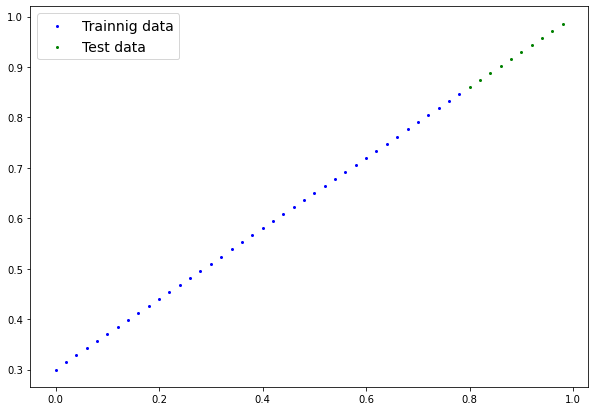

In [33]:
plot_predictions()

In [34]:
# our firsy pytorch model

In [38]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                              dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        # Forward method to define computation in the model
        def forward(self, x: torch.Tensor)->torch.Tensor:
            return self.weights*x +self.bias 
    

Main classes 
    torch.nn - Contains all buildings for computional graphs
    torch.nn.Parameter what parameters our model should try and learn
    torch.nn.Module The base class for all neural network modules, if 
    you subclass it you should overwrite forward()
    torch.optim - where optimizers live
    def forward - All nn.Module subclasses require you to overwrite
    forward() this method defines what happens in forward computations

In [74]:
### Checking content of our module

#Create aninstanse of our model(this is subclass of nn.Module)
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [75]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [78]:
weight, bias

(0.7, 0.3)

In [ ]:
05:30